# **Optimal Travel Distance Analysis - Regression**
Vehicle Data that contains 550 records and 11 columns related to vehicle specifications, road conditions, and travel behavior. The target variable for regression is *optimal_range_km*, which represents the optimal travel distance.

**Data Overview:**
*   **Vehicle Specifications**: fuel_tank_capacity_l, avg_fuel_consumption_l_per_100km, vehicle_weight_kg,
engine_displacement_cc
*   **Environment Conditions**: tire_type, road_condition
*   **Travel Behavior**: avg_speed_kmph,ac_usage_pct, load_weight_kg

**Target Column**
*   optimal_range_km



# **Steps for Analysis and Preprocessing**

*   Exploratory Data Analysis (EDA)
*   Data Preprocessing
*   Modelling
*   Model Evaluation
*   Hyperparameter Tuning


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file
file_path = "https://raw.githubusercontent.com/frfusch21/Manufacture-Otomotive-Analysis/refs/heads/main/Data/Regression_Data_-_Optimal_Travel_Distance.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,vehicle_id,fuel_tank_capacity_l,avg_fuel_consumption_l_per_100km,vehicle_weight_kg,engine_displacement_cc,tire_type,road_condition,avg_speed_kmph,ac_usage_pct,load_weight_kg,optimal_range_km
0,20782,42.120939,6.888482,1459.834963,1602.552616,eco,urban,63.967225,49.379890,214.069170,411.21
1,20041,47.450387,6.723173,1058.341995,860.696588,standard,urban,60.955535,87.399801,55.514826,386.32
2,20092,42.300481,7.888494,1235.465860,782.148398,standard,highway,56.747594,88.729100,128.943488,279.10
3,20696,29.565491,7.148971,1762.682988,1368.406312,eco,urban,55.608631,1.096592,172.396537,375.84
4,20726,60.941780,6.414387,1598.305456,2022.440501,eco,mixed,67.528504,88.629574,172.861241,483.33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   vehicle_id                        550 non-null    int64  
 1   fuel_tank_capacity_l              550 non-null    float64
 2   avg_fuel_consumption_l_per_100km  550 non-null    float64
 3   vehicle_weight_kg                 550 non-null    float64
 4   engine_displacement_cc            550 non-null    float64
 5   tire_type                         550 non-null    object 
 6   road_condition                    550 non-null    object 
 7   avg_speed_kmph                    550 non-null    float64
 8   ac_usage_pct                      550 non-null    float64
 9   load_weight_kg                    550 non-null    float64
 10  optimal_range_km                  550 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 47.4+ KB


## EDA

In [5]:
df.isnull().sum()

,0
vehicle_id,0
fuel_tank_capacity_l,0
avg_fuel_consumption_l_per_100km,0
vehicle_weight_kg,0
engine_displacement_cc,0
tire_type,0
road_condition,0
avg_speed_kmph,0
ac_usage_pct,0
load_weight_kg,0


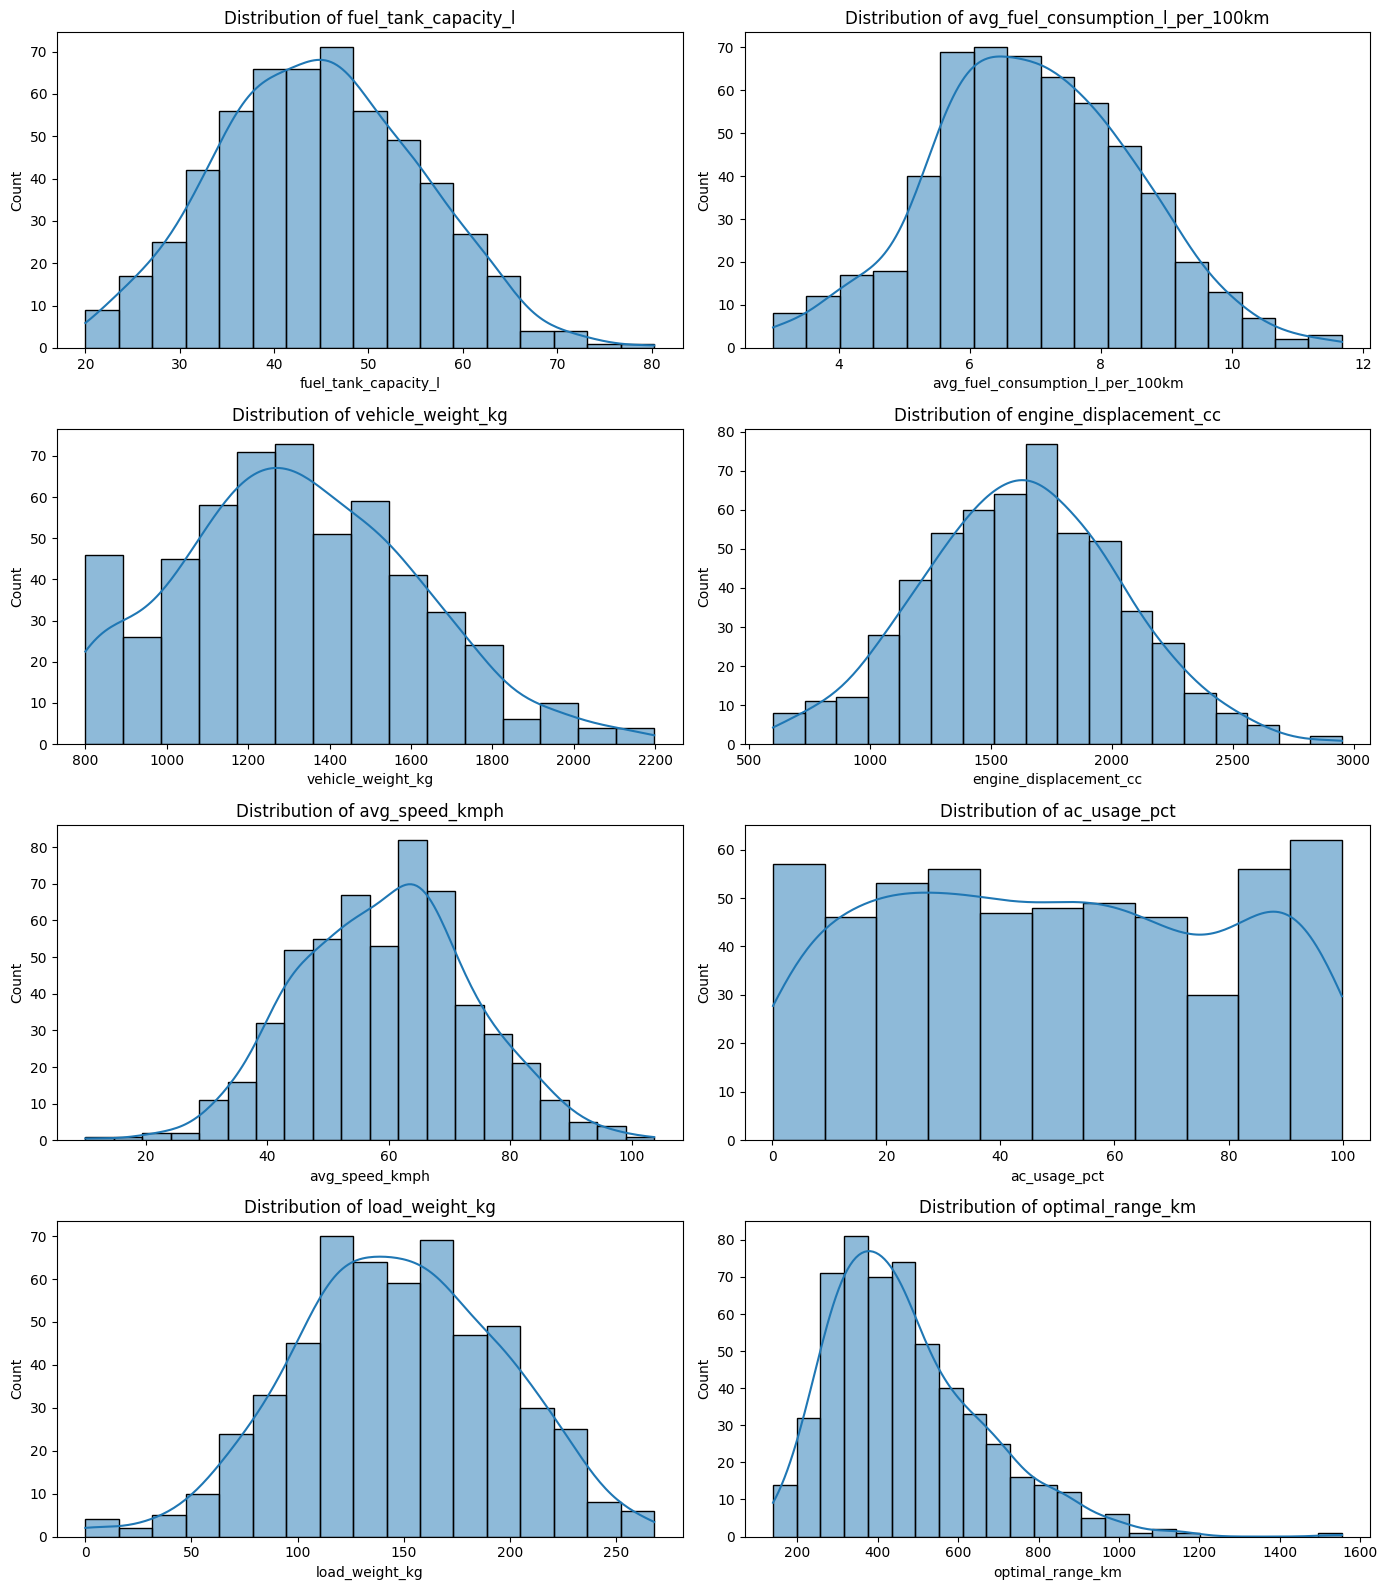

In [12]:
numerical_features = [
    'fuel_tank_capacity_l', 'avg_fuel_consumption_l_per_100km', 'vehicle_weight_kg',
    'engine_displacement_cc', 'avg_speed_kmph', 'ac_usage_pct', 'load_weight_kg', 'optimal_range_km'
]

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

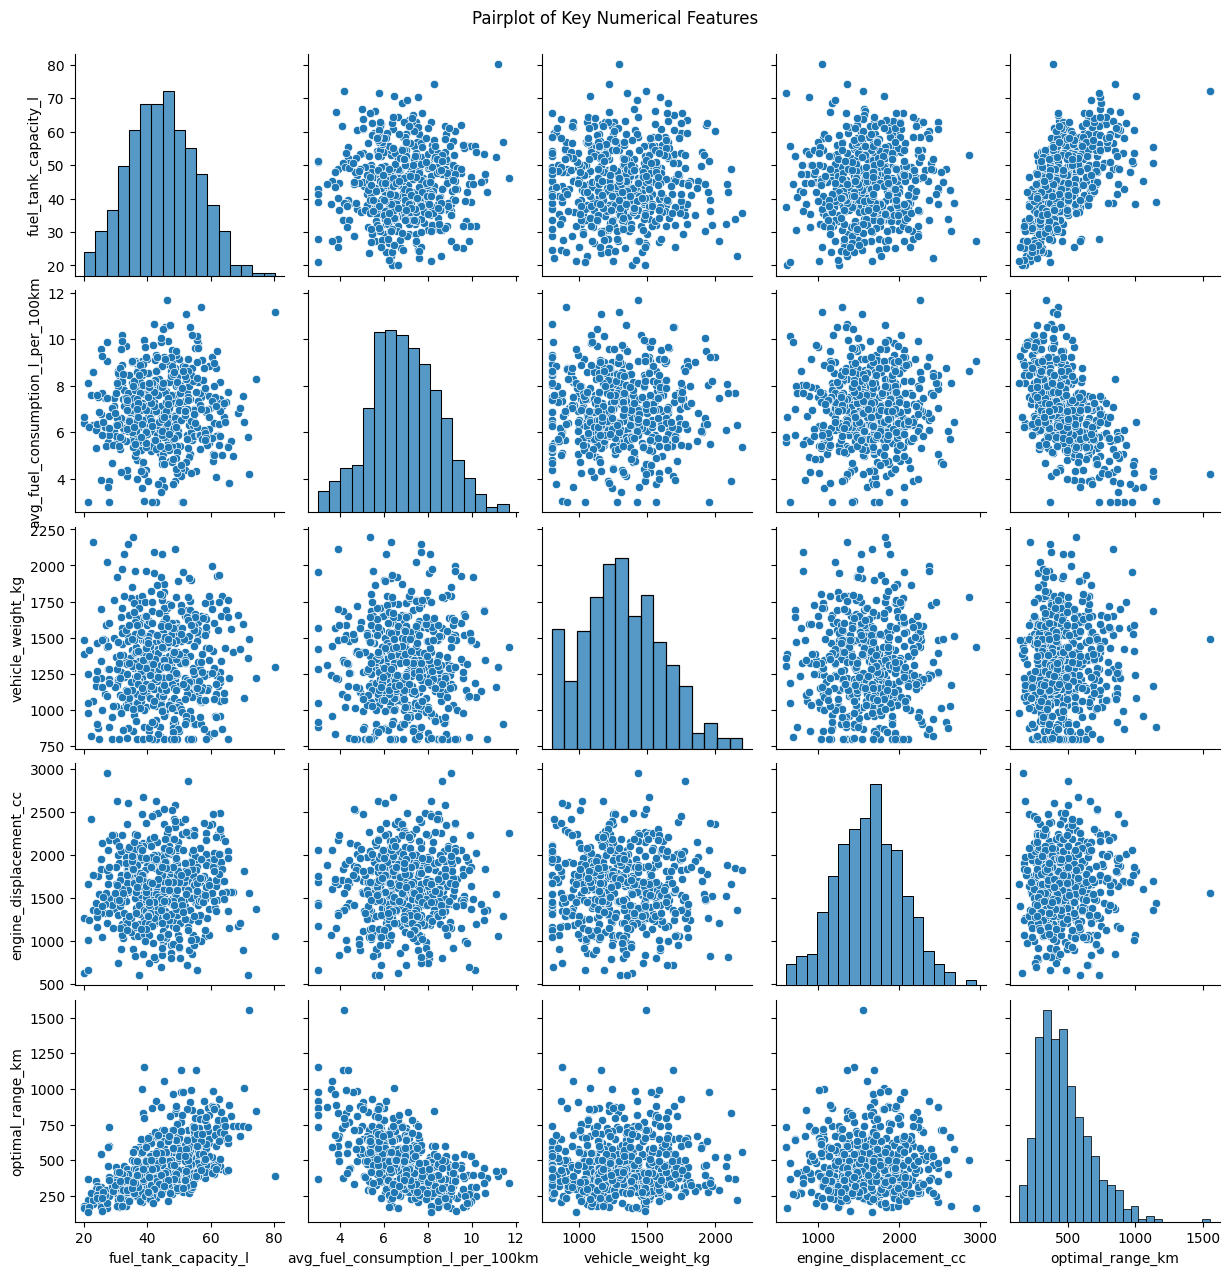

In [10]:
# Pairplot for selected features and the target
selected_features = ['fuel_tank_capacity_l', 'avg_fuel_consumption_l_per_100km',
                     'vehicle_weight_kg', 'engine_displacement_cc', 'optimal_range_km']
sns.pairplot(df[selected_features])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

**Insights**
*   There is a **strong negative correlation** between *avg_fuel_consumption_l_per_100km* and *optimal_range_km*, which is expected that higher fuel consumption results in a lower range. (Some cars perhaps are gas guzzler)
*   *fuel_tank_capacity_l* and *optimal_range_km* show a **positive correlation** which means a larger fuel tank allows for greater range.
*   Fuel Tank Capacity (+) and Fuel Consumption Rate (–) are the top drivers of *optimal_range_km* based on the analysis. The RnD could design vehicles with larger tanks and improved fuel efficiency to maximize range.

We will have to encode the categorical variables next to able to make visualization analysis.

In [6]:
df_encoded = pd.get_dummies(df.drop(columns=["vehicle_id"]), drop_first=True)

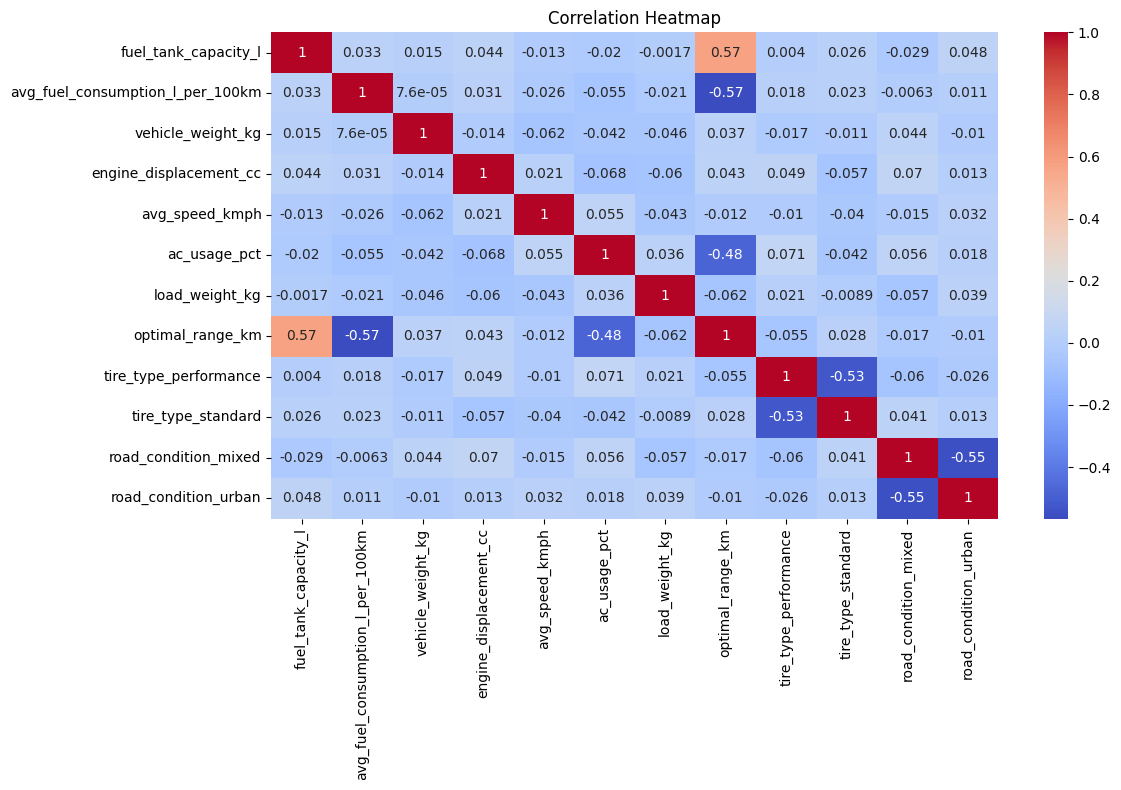

In [9]:
# Check Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

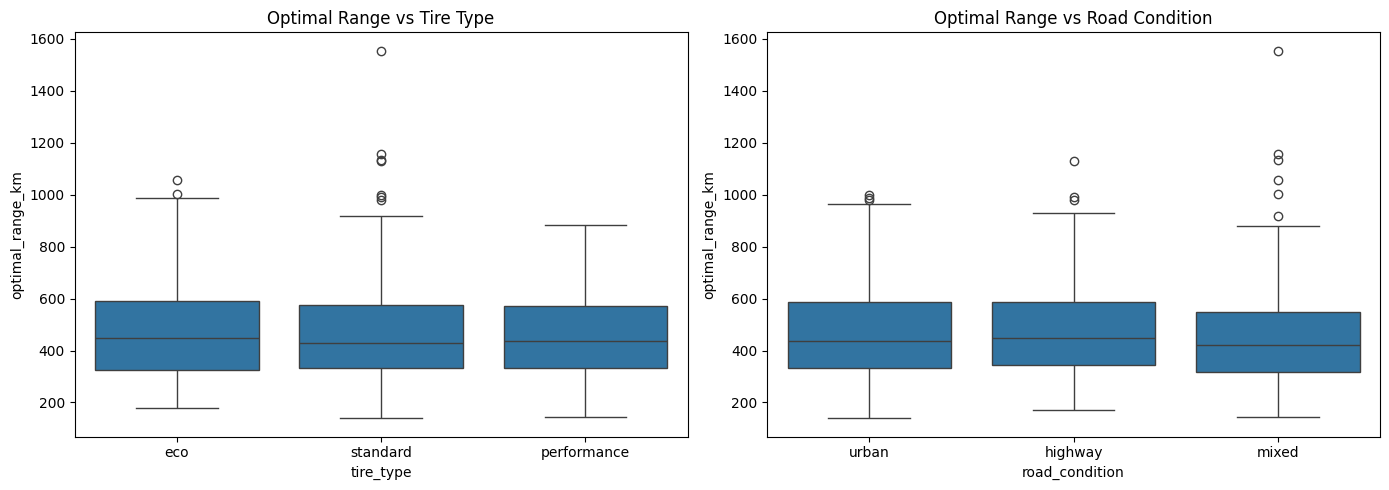

In [11]:
# Boxplots for categorical variables vs. target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x='tire_type', y='optimal_range_km', data=df, ax=axes[0])
axes[0].set_title("Optimal Range vs Tire Type")
sns.boxplot(x='road_condition', y='optimal_range_km', data=df, ax=axes[1])
axes[1].set_title("Optimal Range vs Road Condition")
plt.tight_layout()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor

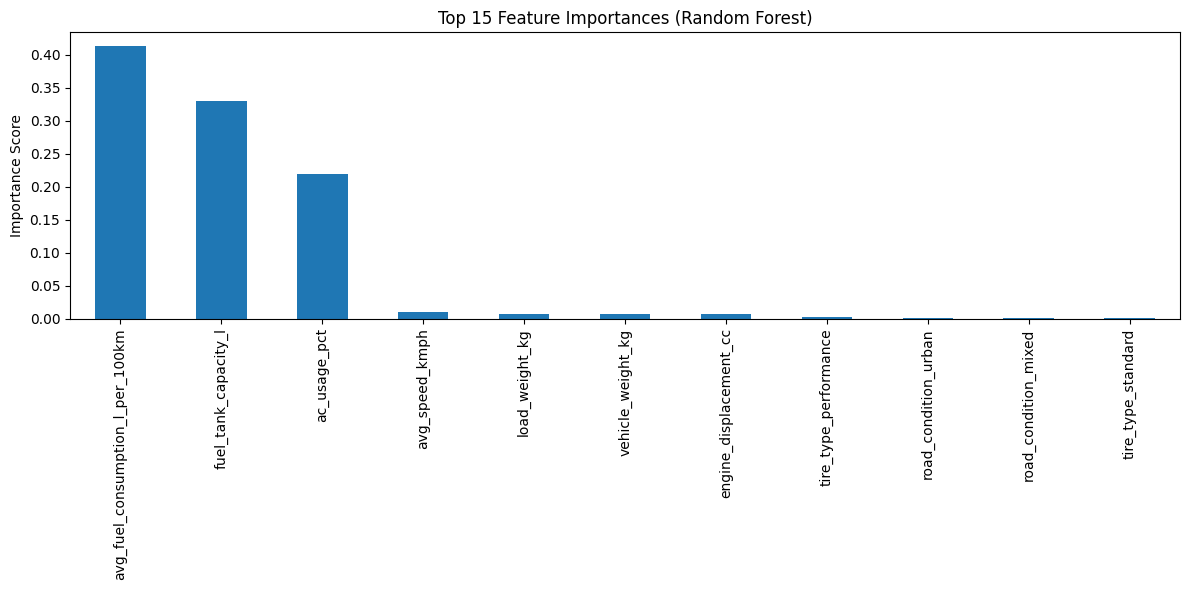

In [16]:
# Feature importance from Random Forest
X = df_encoded.drop(columns=["optimal_range_km"])
y = df_encoded["optimal_range_km"]
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
importances.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

## Data Preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df_model = df.drop(columns=["vehicle_id"])
X = df_model.drop(columns=["optimal_range_km"])
y = df_model["optimal_range_km"]

In [22]:
# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [23]:
# Standardize numerical features
numerical_cols = [
    'fuel_tank_capacity_l', 'avg_fuel_consumption_l_per_100km', 'vehicle_weight_kg',
    'engine_displacement_cc', 'avg_speed_kmph', 'ac_usage_pct', 'load_weight_kg'
]
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

In [24]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

X_train.head()

,fuel_tank_capacity_l,avg_fuel_consumption_l_per_100km,vehicle_weight_kg,engine_displacement_cc,avg_speed_kmph,ac_usage_pct,load_weight_kg,tire_type_performance,tire_type_standard,road_condition_mixed,road_condition_urban
482,-0.638179,-0.741035,0.741279,-1.205948,-0.256241,0.462908,0.437901,False,True,False,False
158,2.786956,0.859239,-0.351676,-0.642800,1.020694,-1.527376,-1.553219,False,True,False,True
15,1.277372,0.487983,1.422478,-1.382830,-1.900319,1.582747,-1.508501,False,False,False,True
334,1.033758,2.054219,-0.455607,-2.360852,1.799910,-1.512699,0.922511,False,False,False,True
39,-0.181670,0.069312,-1.335041,0.702230,-1.418978,0.742769,-0.850684,False,True,False,True


## Modelling and Eval

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(verbosity=0, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "RMSE": rmse, "R2 Score": r2})

results_df = pd.DataFrame(results)

In [28]:
results_df

,Model,RMSE,R2 Score
0,Linear Regression,68.270680,0.901925
1,Random Forest,69.265971,0.899044
2,XGBoost,64.949128,0.911236


## Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grids = {
    "Linear Regression": {
        "fit_intercept": [True, False],
        "positive": [True, False]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
        "random_state": [0,42,100]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 6],
        "learning_rate": [0.1, 0.01],
        "subsample": [0.8, 1.0],
        "random_state": [0,42,100]
    }
}

# Grid search
best_models = {}

for name in models:
    grid = GridSearchCV(models[name], param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"{name} Best Parameters: {grid.best_params_}")

Linear Regression Best Parameters: {'fit_intercept': True, 'positive': False}
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0}
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.8}


In [34]:
# Use best parameter
models = {
    "Linear Regression": LinearRegression(), #Best parameter is default
    "Random Forest": RandomForestRegressor(max_depth= 10,
                                           min_samples_split= 2,
                                           n_estimators= 100, random_state=0),
    "XGBoost": XGBRegressor(verbosity=0, learning_rat= 0.1, max_depth= 3, n_estimators= 200,
                            random_state=42, subsample= 0.8)
}

results_cv = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results_cv.append({"Model": name, "RMSE": rmse, "R2 Score": r2})

results_df_cv = pd.DataFrame(results_cv)

In [35]:
results_df_cv

,Model,RMSE,R2 Score
0,Linear Regression,68.270680,0.901925
1,Random Forest,71.146569,0.893488
2,XGBoost,47.756434,0.952009


# Conclusion and Suggestions

*   **XGBoost** is the best-performing model. It achieved the lowest** RMSE (47.76)**, indicating the most accurate predictions. It also reached the highest **R² score (0.952)**, which over 95% of the variance in the optimal travel range.
*   Use **XGBoost** for deployment or prediction tasks, especially if model interpretability is not the primary concern. While you can also use **Linear Regression** if you prioritize simplicity and speed.




